In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avocado-prices/avocado.csv


In [2]:
avocado_filepath = '../input/avocado-prices/avocado.csv'
avocado = pd.read_csv(avocado_filepath)
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


파일 경로를 불러와서 데이터를 불러온다.

In [ ]:
avocado.shape

In [5]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
avocado_type = avocado.groupby('type')['Total Volume'].agg([min, max])
avocado_type

,min,max
type,,
conventional,33699.68,62505646.52
organic,84.56,1814929.97


type을 그룹화 하여 각 type의 아보카도 총판매량의 최솟값, 최댓값을 구한다. 

In [ ]:
sns.lineplot(data=avocado, x = 'year', y = 'Total Volume', hue = 'type')

년도에 따른 아보카도의 판매량을 type으로 나누어 시각화하였다.

type이 conventional일 경우가 organic일 때보다 훨씬 많이 판매되었음을 알 수 있다. 

In [ ]:
sns.lineplot(data=avocado, x = 'year', y = 'Total Bags', hue = 'type')

[Text(0, 0, 'Albany'),
 Text(0, 0, 'Atlanta'),
 Text(0, 0, 'BaltimoreWashington'),
 Text(0, 0, 'Boise'),
 Text(0, 0, 'Boston'),
 Text(0, 0, 'BuffaloRochester'),
 Text(0, 0, 'California'),
 Text(0, 0, 'Charlotte'),
 Text(0, 0, 'Chicago'),
 Text(0, 0, 'CincinnatiDayton'),
 Text(0, 0, 'Columbus'),
 Text(0, 0, 'DallasFtWorth'),
 Text(0, 0, 'Denver'),
 Text(0, 0, 'Detroit'),
 Text(0, 0, 'GrandRapids'),
 Text(0, 0, 'GreatLakes'),
 Text(0, 0, 'HarrisburgScranton'),
 Text(0, 0, 'HartfordSpringfield'),
 Text(0, 0, 'Houston'),
 Text(0, 0, 'Indianapolis'),
 Text(0, 0, 'Jacksonville'),
 Text(0, 0, 'LasVegas'),
 Text(0, 0, 'LosAngeles'),
 Text(0, 0, 'Louisville'),
 Text(0, 0, 'MiamiFtLauderdale'),
 Text(0, 0, 'Midsouth'),
 Text(0, 0, 'Nashville'),
 Text(0, 0, 'NewOrleansMobile'),
 Text(0, 0, 'NewYork'),
 Text(0, 0, 'Northeast'),
 Text(0, 0, 'NorthernNewEngland'),
 Text(0, 0, 'Orlando'),
 Text(0, 0, 'Philadelphia'),
 Text(0, 0, 'PhoenixTucson'),
 Text(0, 0, 'Pittsburgh'),
 Text(0, 0, 'Plains'),
 Tex

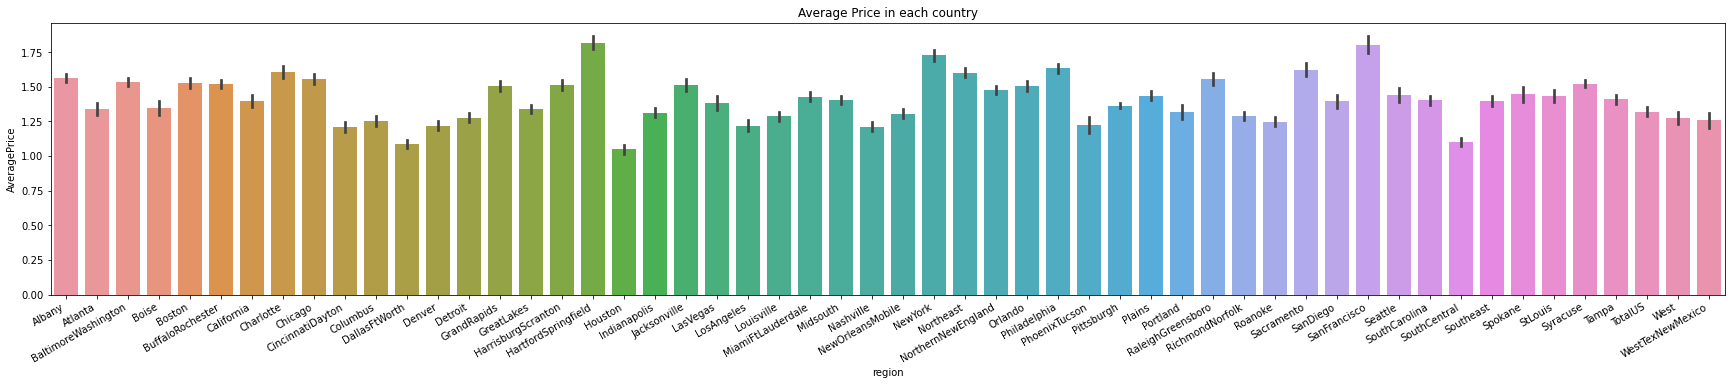

In [11]:
plt.figure(figsize = (30,5))
plt.title("Average Price in each country")
chart = sns.barplot(x = avocado.region, y = avocado.AveragePrice)
chart.set_xticklabels(chart.get_xticklabels(), rotation=30,horizontalalignment='right')

나라별 아포카도의 가격을 시각화한다.

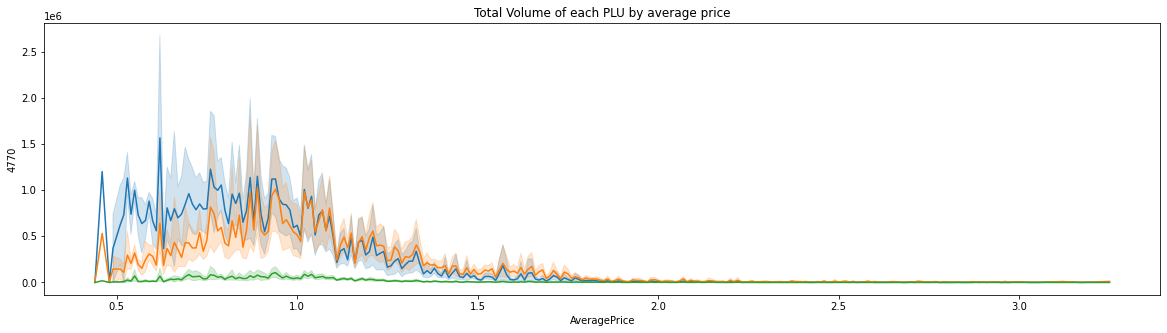

In [12]:
plt.figure(figsize = (20,5))
plt.title("Total Volume of each PLU by average price")
sns.lineplot(data = avocado, x='AveragePrice',y='4046')
sns.lineplot(data = avocado, x='AveragePrice',y='4225')
sns.lineplot(data = avocado, x='AveragePrice',y='4770')


평균 가격에 따른 판매량을 PLU코드에 따른 총 판매량을 시각화하였다.

In [ ]:
sns.kdeplot(data = avocado['Small Bags'], label = 'Small Bags', shade = True)
sns.kdeplot(data = avocado['Large Bags'], label = 'Large Bags', shade = True)
sns.kdeplot(data = avocado['XLarge Bags'], label = 'XLarge Bags', shade = True)

Small Bags, Large Bags, XLarge Bags로 나누어 분포 정도를 나타낸다.

In [ ]:
sns.scatterplot(data = avocado, x = 'AveragePrice', y = 'Total Volume')

평균 가격에 따른 판매량을 시각화하였다.
가격이 저렴할 수록 판매량이 높다는 것을 알 수 있다. 